In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [270]:
# Importing Train.csv

df=pd.read_csv('train.csv')
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [271]:
# Dimensions Of Dataset

df.shape

(1460, 81)

In [272]:
# Checking Null Values

round(df.isnull().sum(axis=0)/len(df.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Data Preparation

In [273]:
 #Checking Value counts

df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [274]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [275]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### Imputing Null values

In [276]:
df['Alley']=df['Alley'].fillna('No alley access')

In [277]:
df['Alley'].value_counts()

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [278]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [279]:
# Imputing Null values in different columns

df['BsmtQual']=df['BsmtQual'].fillna('No Basement')
df['BsmtCond']=df['BsmtCond'].fillna('No Basement')
df['BsmtExposure']=df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('No Basement')

df['BsmtFinType2']=df['BsmtFinType2'].fillna('No Basement')
df['FireplaceQu']=df['FireplaceQu'].fillna('No Fireplace')
df['GarageType']=df['GarageType'].fillna('No Garage')
df['GarageYrBlt']=df['GarageYrBlt'].fillna('No Garage')
df['GarageFinish']=df['GarageFinish'].fillna('No Garage')
df['GarageQual']=df['GarageQual'].fillna('No Garage')
df['GarageCond']=df['GarageCond'].fillna('No Garage')
df['PoolQC']=df['PoolQC'].fillna('No Pool')
df['Fence']=df['Fence'].fillna('No Fence')
df['MiscFeature']=df['MiscFeature'].fillna('None')


In [280]:
# Checking Percentage of NULL's in dataframe
round(df.isnull().sum(axis=0)/len(df.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [281]:
# Dropping 'LotFrontage' column

df=df.drop(['LotFrontage'],axis=1)

In [282]:
#Deleting rows that contains null values

df=df.loc[df.isnull().sum(axis=1)/len(df.index)*100==0]

In [283]:
round(df.isnull().sum(axis=0)/len(df.index)*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [284]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-

In [286]:
# Checking columns in DataFrame

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

### Reducing Number of categorical values in Columns

#### There are so many values in categorical columns. It will create huge number of dummy variables so I combined values with low frequencies in single term ' Other' in each column.

In [287]:
var1=['MSZoning','Street','Alley','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','RoofStyle','RoofMatl','Exterior1st','MasVnrType','Foundation','Heating','HeatingQC','Electrical','GarageType','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']

for i in var1:
    p=pd.DataFrame(df[i].value_counts())
    p=p.reset_index()
    p.columns=['uni','ess']
    for k in range(0,len(p)):
        if p['ess'][k]<=50:
            #df['Neighborhood']=df['Neighborhood'].map({p['uni'][k]:'other'})
            df[i].replace(p['uni'][k],'Other',inplace=True)


In [288]:
#Checking value counts in each categorical column after convering low frequencies in 'Other'
for i in var1:
    print(df[i].value_counts())

RL       1145
RM        218
FV         62
Other      26
Name: MSZoning, dtype: int64
Pave     1445
Other       6
Name: Street, dtype: int64
No alley access    1361
Other                90
Name: Alley, dtype: int64
Lvl      1302
Other      86
Bnk        63
Name: LandContour, dtype: int64
Inside     1045
Corner      262
CulDSac      93
Other        51
Name: LotConfig, dtype: int64
Gtl      1373
Mod        65
Other      13
Name: LandSlope, dtype: int64
Other      364
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
BrkSide     58
SawyerW     58
Name: Neighborhood, dtype: int64
Norm     1251
Other     119
Feedr      81
Name: Condition1, dtype: int64
1Fam      1212
TwnhsE     113
Other       74
Duplex      52
Name: BldgType, dtype: int64
Gable    1133
Hip       285
Other      33
Name: RoofStyle, dtype: int64
CompShg    1425
Other        26
Name: RoofMatl, dtype: int64
VinylSd    509
HdBoard    222
MetalSd 

In [289]:
#Checking different percentiles for finding out 'Outliers'

df.describe(percentiles=(.25,.50,.75,.90,.95,.99))

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.000000,120.000000,14375.000000,8.000000,7.000000,2006.000000,2006.000000,335.00000,1064.000000,119.000000,1232.000000,1602.000000,1680.000000,954.000000,0.000000,2158.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.000000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.500000,160.000000,17308.500000,8.000000,8.000000,2007.000000,2007.000000,456.00000,1272.000000,398.000000,1468.000000,1749.000000,1827.000000,1141.500000,0.000000,2464.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,849.000000,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,325812.000000
99%,1445.500000,190.000000,37802.000000,10.000000,9.000000,2009.000000,2009.000000,792.00000,1572.500000,832.000000,1797.500000,2155.500000,2212.000000,1420.000000,360.000000,3126.000000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000

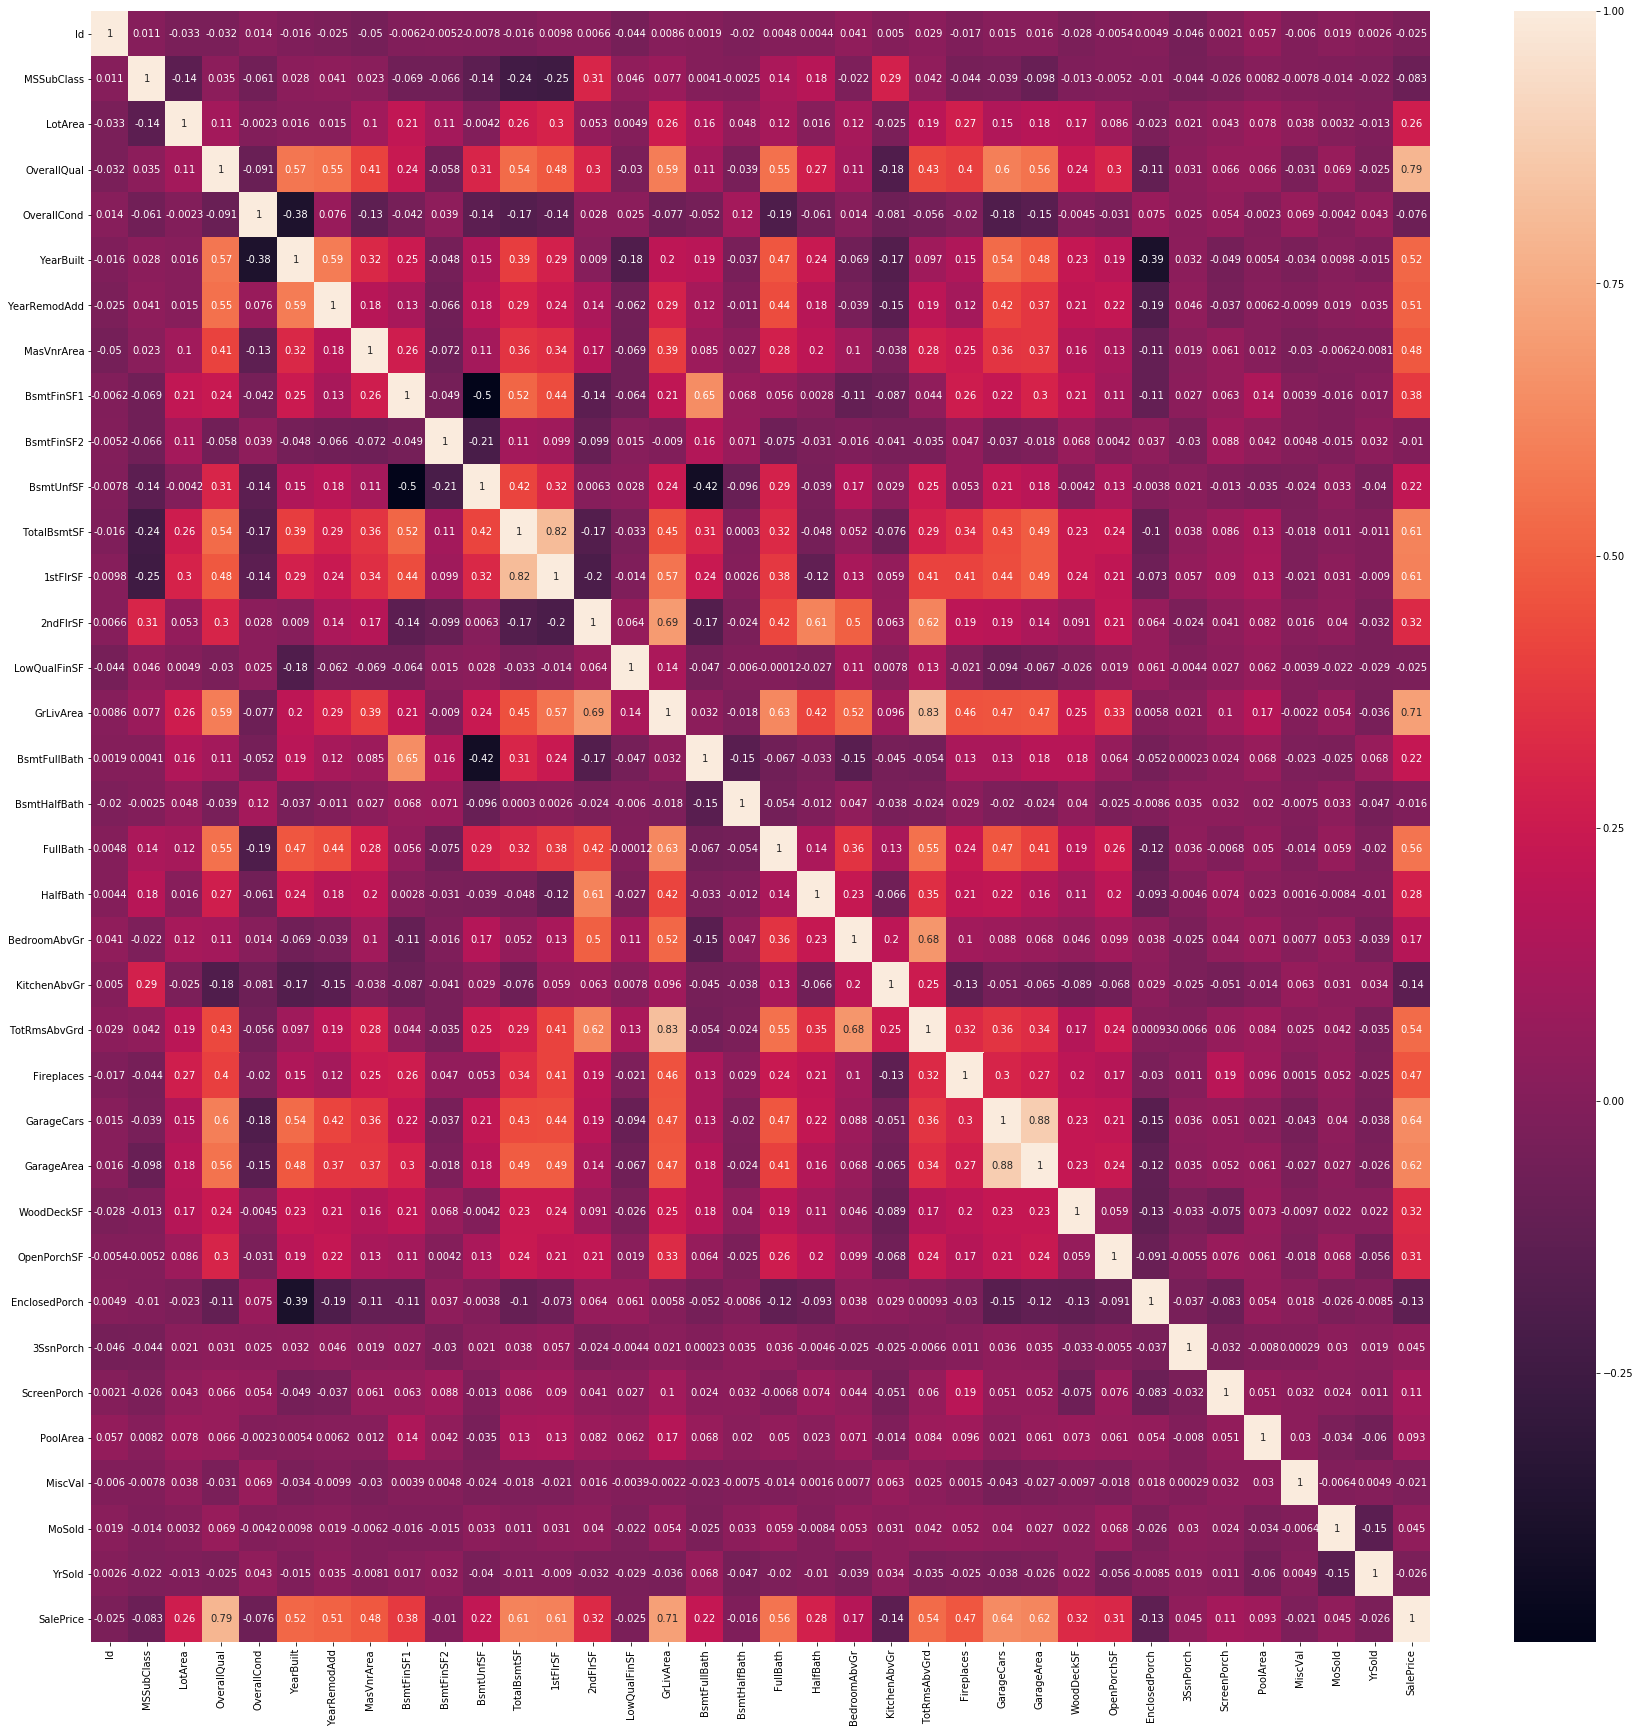

In [290]:
# Creating heatmap for continues features

plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Creating dummy variables

In [291]:
X_cat = df.copy()
X_cat = df.select_dtypes(include=['object'])
X_enc = X_cat.copy()


In [292]:
X_enc.shape

(1451, 44)

In [293]:
X_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 44 columns):
MSZoning         1451 non-null object
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 non-null object
ExterQual        1451 non-null object
ExterCond        1451 non-null object
Foundation       1451 non-null object
BsmtQual         1451 non-null object
BsmtCond         1451 non-null object
BsmtExposure     14

In [294]:
var=['MSZoning','Street','Alley','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','RoofStyle','RoofMatl','Exterior1st','MasVnrType','Foundation','Heating','HeatingQC','Electrical','GarageType','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']

X_enc=pd.get_dummies(X_enc,columns=var,drop_first=True)
#X_enc=X_enc.drop(var,axis=1)
#df=df.drop(var,axis=1)
X_enc.head()

,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,Reg,AllPub,Norm,2Story,VinylSd,Gd,TA,Gd,TA,No,GLQ,Unf,Y,Gd,Typ,No Fireplace,2003,RFn,TA,TA,No Pool,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,Reg,AllPub,Norm,1Story,MetalSd,TA,TA,Gd,TA,Gd,ALQ,Unf,Y,TA,Typ,TA,1976,RFn,TA,TA,No Pool,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
2,IR1,AllPub,Norm,2Story,VinylSd,Gd,TA,Gd,TA,Mn,GLQ,Unf,Y,Gd,Typ,TA,2001,RFn,TA,TA,No Pool,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
3,IR1,AllPub,Norm,2Story,Wd Shng,TA,TA,TA,Gd,No,ALQ,Unf,Y,Gd,Typ,Gd,1998,Unf,TA,TA,No Pool,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,IR1,AllPub,Norm,2Story,VinylSd,Gd,TA,Gd,TA,Av,GLQ,Unf,Y,Gd,Typ,TA,2000,RFn,TA,TA,No Pool,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0


In [295]:
X_enc=X_enc.drop('GarageYrBlt',axis=1)

### Label Encoding

In [296]:
from sklearn import preprocessing

In [297]:
label=preprocessing.LabelEncoder()

#label_var=['LotShape','Utilities','ExterQual', 'ExterCond','BsmtExposure','HouseStyle', 'BsmtFinType1','BsmtFinType2','KitchenQual','Functional','FireplaceQu','BsmtQual','GarageFinish','GarageQual', 'BsmtCond','GarageCond','PoolQC']
#for i in label_var:
    #df[i]=label.fit_transform(df[i])
X_enc = X_enc.apply(label.fit_transform)
df = df.drop(X_cat.columns, axis=1)


In [298]:
X_enc.head()

,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,3,0,2,5,13,2,4,2,4,3,2,6,1,2,6,3,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,3,0,2,2,8,3,4,2,4,1,0,6,1,3,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
2,0,0,2,5,13,2,4,2,4,2,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
3,0,0,2,5,15,3,4,4,1,3,0,6,1,2,6,2,3,5,5,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,0,0,2,5,13,2,4,2,4,0,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0


In [299]:
#Merging Dataframes

df = pd.concat([df,X_enc], axis=1)

In [300]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,0,2,5,13,2,4,2,4,3,2,6,1,2,6,3,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,3,0,2,2,8,3,4,2,4,1,0,6,1,3,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,2,5,13,2,4,2,4,2,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,2,5,15,3,4,4,1,3,0,6,1,2,6,2,3,5,5,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,2,5,13,2,4,2,4,0,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0


In [301]:
#Dropping Few More Unnecessay columns

df=df.drop(['Id','MSSubClass','MoSold'],axis=1)

In [302]:
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2008,208500,3,0,2,5,13,2,4,2,4,3,2,6,1,2,6,3,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,2007,181500,3,0,2,2,8,3,4,2,4,1,0,6,1,3,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
2,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,2008,223500,0,0,2,5,13,2,4,2,4,2,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
3,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2006,140000,0,0,2,5,15,3,4,4,1,3,0,6,1,2,6,2,3,5,5,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,2008,250000,0,0,2,5,13,2,4,2,4,0,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0


In [303]:
#Creating New Columns from 'YrSold',YearBuilt' and 'YearRemodAdd'

df['Year since built']=df['YrSold']-df['YearBuilt']
df['Year since Remodel']=df['YrSold']-df['YearRemodAdd']


In [304]:
# Droping old 'Year' columns

df=df.drop(['YrSold','YearBuilt','YearRemodAdd'],axis=1)

In [305]:
df.head(10)

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Year since built,Year since Remodel
0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,3,0,2,5,13,2,4,2,4,3,2,6,1,2,6,3,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,5,5
1,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,3,0,2,2,8,3,4,2,4,1,0,6,1,3,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,31,31
2,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,0,0,2,5,13,2,4,2,4,2,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,7,6
3,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,0,0,2,5,15,3,4,4,1,3,0,6,1,2,6,2,3,5,5,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,91,36
4,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,0,0,2,5,13,2,4,2,4,0,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,8,8
5,14115,5,5,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,143000,0,0,2,0,13,3,4,2,4,3,2,6,1,3,6,3,3,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,16,14
6,10084,8,5,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,307000,3,0,2,2,13,2,4,0,4,0,2,6,1,2,6,2,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,3,2
7,10382,7,6,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,200000,0,0,2,5,6,3,4,2,4,2,0,1,1,3,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,36,36
8,6120,7,5,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,129900,3,0,2,0,15,3,4,4,4,3,6,6,1,3,2,5,3,1,5,3,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,

In [306]:
df.shape

(1451, 117)

### Target variable Distribution plot

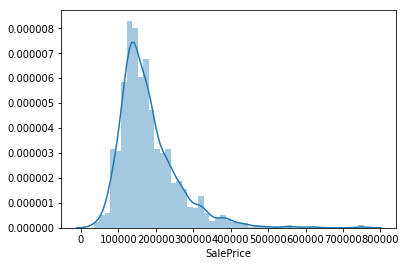

In [307]:
sns.distplot(df['SalePrice'])

In [308]:
from scipy.stats import skew

In [309]:
df['SalePrice']=np.log(df['SalePrice'])

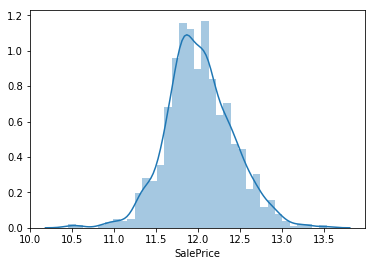

In [310]:
sns.distplot(df['SalePrice'])

#### Target variable plot were 'Right Skewed' so I changed it into 'Logarithmic' scale

In [311]:
df.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Year since built,Year since Remodel
0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,12.247694,3,0,2,5,13,2,4,2,4,3,2,6,1,2,6,3,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,5,5
1,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,12.109011,3,0,2,2,8,3,4,2,4,1,0,6,1,3,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,31,31
2,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,12.317167,0,0,2,5,13,2,4,2,4,2,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,7,6
3,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,11.849398,0,0,2,5,15,3,4,4,1,3,0,6,1,2,6,2,3,5,5,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,91,36
4,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12.429216,0,0,2,5,13,2,4,2,4,0,2,6,1,2,6,5,2,5,5,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,8,8


## Preprocessing

### Spliting

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
#Poping out 'Target' value from the dataframe and putting it into 'y'.

y=df.pop('SalePrice')

In [314]:
# Spliting data into 'Train' and 'Test'

X_train,X_test,y_train,y_test=train_test_split(df,y,train_size=.7,test_size=.3,random_state=90)

### Scaling

In [315]:
from sklearn.preprocessing import StandardScaler

In [316]:
#Selected columns for scaling

var=['LotArea','MasVnrArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','Year since built','Year since Remodel','LotShape','OverallQual'
    , 'OverallCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','FullBath','BedroomAbvGr','KitchenAbvGr',
    'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageFinish','GarageCars','GarageQual','GarageCond',
     'PoolQC','Year since built','Year since Remodel','Condition2','HouseStyle','Exterior2nd','ExterCond']


In [317]:
# Min- Max Scaling on 'Train' Dataset

for i in var:
    X_train[i]=(X_train[i]-X_train[i].min())/(X_train[i].max()-X_train[i].min())

#scaler=StandardScaler()
#X_train[var]=pd.DataFrame(scaler.fit_transform(X_train[var]))


In [318]:
X_train.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Year since built,Year since Remodel
120,0.093447,0.555556,0.428571,0.000000,0.415044,0.0,0.000000,0.292576,0.225985,0.000000,0,0.150622,1,0,0.333333,0,0.166667,0.0,0.2,0.666667,0.5,0.388489,0.000000,0.237660,0.0,0.319410,0.00000,0,0,0.0,0,0.285714,1.000000,0.666667,3,1.0,1.0,1.0,0.25,0.000000,1.0,1,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.272059,0.622951
1425,0.043243,0.555556,0.571429,0.151875,0.000000,0.0,0.535959,0.390518,0.317208,0.000000,0,0.211423,0,0,0.333333,0,0.500000,0.0,0.5,0.000000,0.5,0.379856,0.000000,0.071298,0.0,0.000000,0.00000,0,0,0.0,0,0.285714,0.285714,0.400000,2,1.0,1.0,1.0,0.75,1.000000,1.0,1,0.666667,1.0,0.6,1.000000,1.0,1.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.360294,0.819672
1037,0.036315,0.777778,0.428571,0.247500,0.000000,0.0,0.451627,0.329070,0.249136,0.584988,0,0.444265,0,0,0.666667,1,0.500000,0.0,0.5,0.333333,0.5,0.651079,0.000000,0.082267,0.0,0.000000,0.39375,0,0,1.0,0,0.285714,0.714286,0.866667,2,1.0,0.5,1.0,0.75,1.000000,1.0,1,0.666667,1.0,1.0,0.000000,1.0,1.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.051471,0.114754
752,0.036296,0.555556,0.428571,0.000000,0.530973,0.0,0.119435,0.461323,0.400829,0.000000,0,0.267158,1,0,0.666667,0,0.500000,0.0,0.4,0.000000,0.5,0.414388,0.196033,0.049360,0.0,0.000000,0.00000,0,0,0.0,0,0.285714,0.285714,0.866667,3,0.5,0.5,1.0,0.25,0.333333,1.0,1,0.666667,1.0,0.6,0.666667,1.0,1.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.066176,0.163934
889,0.049975,0.555556,0.285714,0.056250,0.453097,0.0,0.205908,0.469432,0.404630,0.000000,0,0.269691,1,0,0.333333,0,0.333333,0.0,0.4,0.333333,0.5,0.363309,0.000000,0.000000,0.0,0.398034,0.00000,0,0,1.0,0,0.285714,0.285714,0.933333,3,1.0,1.0,1.0,0.75,0.166667,1.0,1,1.000000,1.0,1.0,0.666667,1.0,1.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.411765,0.934426


## Model Building & Evaluation

### Ridge and Lasso Regression

In [319]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [320]:
#Cross Validation Matrix

cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=300]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.179810,0.331337,0.003926,0.006881,0.0001,{'alpha': 0.0001},-0.092075,-0.082692,-0.103922,-0.097428,-0.089937,-0.093211,0.007144,7,-0.076962,-0.079199,-0.074055,-0.073099,-0.078273,-0.076318,0.002367
1,0.012610,0.000801,0.001206,0.002412,0.001,{'alpha': 0.001},-0.092074,-0.082683,-0.103920,-0.097431,-0.089925,-0.093207,0.007147,6,-0.076961,-0.079202,-0.074057,-0.073100,-0.078275,-0.076319,0.002368
2,0.005695,0.005184,0.004340,0.003608,0.01,{'alpha': 0.01},-0.092061,-0.082605,-0.103897,-0.097463,-0.089808,-0.093167,0.007178,4,-0.076954,-0.079223,-0.074079,-0.073106,-0.078293,-0.076331,0.002370
3,0.004245,0.003854,0.001907,0.002910,0.05,{'alpha': 0.05},-0.092008,-0.082358,-0.103817,-0.097602,-0.089357,-0.093029,0.007290,2,-0.076934,-0.079296,-0.074169,-0.073138,-0.078361,-0.076380,0.002372
4,0.004054,0.004323,0.001620,0.003240,0.1,{'alpha': 0.1},-0.091956,-0.082506,-0.103749,-0.097770,-0.088931,-0.092983,0.007295,1,-0.076949,-0.079369,-0.074271,-0.073196,-0.078443,-0.076446,0.002370


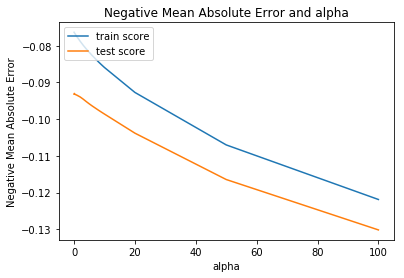

In [321]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha']

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [322]:
#Creating Ridge Model

alpha = 250
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=250, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [323]:
#Coffiecint Values in Ridge

ridge.coef_

array([ 1.00781136e-02,  6.15563516e-02,  2.14403173e-02,  2.16479194e-02,
        4.23524815e-02,  6.11488045e-03,  2.24567119e-02,  4.90295761e-02,
        5.10649031e-02,  4.52118810e-02,  6.22862062e-05,  5.55376384e-02,
        4.90406764e-02,  3.57632420e-03,  5.23630530e-02,  5.69535980e-02,
        2.73585894e-02, -4.76935276e-03,  5.38920325e-02,  6.63079124e-02,
        6.23030753e-02,  4.97542564e-02,  2.43245200e-02,  2.11168830e-02,
       -2.50312519e-03,  2.95900293e-03,  1.54421267e-02,  6.45552934e-04,
       -7.24041191e-06, -3.57875016e-02, -5.29443441e-04, -1.12464848e-03,
        8.60983952e-03,  8.06498864e-03, -8.36909338e-02,  1.08295077e-02,
       -5.31620171e-02,  1.43157184e-02, -2.82200135e-02, -2.11586706e-02,
        2.41633926e-03,  3.77455709e-02, -4.48257439e-02,  6.79190393e-03,
       -7.60105076e-03, -3.48194751e-02,  1.67042533e-02,  2.70143440e-02,
       -7.79393000e-04, -1.66697118e-02,  4.67925713e-02, -4.11000231e-02,
        1.78654484e-03, -

### Finding 'Name of columns' with there 'cofficient values'  

In [324]:
#Creating Dataframe with 'Ridge' cofficients

df_ridge=pd.DataFrame(ridge.coef_)

In [325]:
df_ridge.head()

,0
0,0.010078
1,0.061556
2,0.021440
3,0.021648
4,0.042352


In [326]:
df_ridge.columns=['1']

In [327]:
# Column name of X_train and creating different datraframe for that
df_col=pd.DataFrame(X_train.columns)

In [328]:
df_col.head()

,0
0,LotArea
1,OverallQual
2,OverallCond
3,MasVnrArea
4,BsmtFinSF1


In [329]:
df_col.shape

(116, 1)

In [330]:
# Merging df_ridge and df_col dataframe 
df_coff=pd.concat([df_col,df_ridge],axis=1)

In [331]:
df_coff.head()

,0,1
0,LotArea,0.010078
1,OverallQual,0.061556
2,OverallCond,0.021440
3,MasVnrArea,0.021648
4,BsmtFinSF1,0.042352


In [332]:
df_coff.shape

(116, 2)

In [333]:
#Assigning colum name to the columns in df_coff
df_coff.columns=['Features','Cofficients']

In [334]:
df_coff.head()

,Features,Cofficients
0,LotArea,0.010078
1,OverallQual,0.061556
2,OverallCond,0.021440
3,MasVnrArea,0.021648
4,BsmtFinSF1,0.042352


In [335]:
df_coff.shape

(116, 2)

## Important Variable after Ridge Regression

In [336]:
df_coff.sort_values(by=['Cofficients'],ascending=False)

,Features,Cofficients
19,Fireplaces,0.066308
20,GarageCars,0.062303
1,OverallQual,0.061556
15,HalfBath,0.056954
11,GrLivArea,0.055538
18,TotRmsAbvGrd,0.053892
91,Foundation_PConc,0.052791
14,FullBath,0.052363
8,1stFlrSF,0.051065
21,GarageArea,0.049754


#### Top Variables after ridge are: OverallQual, GrLivArea, GarageCars, Fireplaces, MSZoning_RL, Foundation_PConc, BsmtFullBath

### Predicting 'Target' values for train dataframe using 'Ridge' Regression Object

In [337]:
y_train_pred_ridge=ridge.predict(X_train)
y_train_pred_ridge

array([12.05011543, 11.98675373, 12.3210916 , ..., 12.0115192 ,
       11.83485923, 12.13789561])

In [338]:
# Changing Scale of target values back to normal
y_train_ridge=np.exp(y_train)

In [339]:
#Changing Scale of predicted values back to normal
y_train_pred_ridge=np.exp(y_train_pred_ridge)

In [340]:
#Error( Residuals) for train Dataframe( Using Ridge)
train_error_ridge=y_train_pred_ridge-y_train_ridge

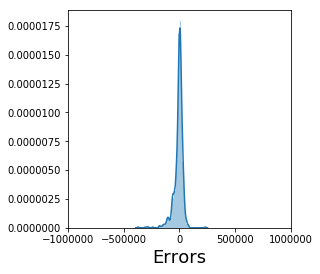

In [341]:
# Plotting Distplot for Residuals

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(111)
ax.set_xlim(-1000000,1000000)
sns.distplot(train_error_ridge)
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Scaling X_Test DataFrame

In [342]:
for i in var:
    X_test[i]=(X_test[i]-X_test[i].min())/(X_test[i].max()-X_test[i].min())

In [343]:
X_test.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Year since built,Year since Remodel
1196,0.080875,0.666667,0.5,0.000000,0.000000,0.0,0.439061,0.143863,0.103667,0.665314,0,0.273828,0,0,0.666667,1,0.500,0.333333,0.545455,0.333333,0.75,0.465444,0.137363,0.032505,0.000000,0.0,0.0,0,0,0.0,0,0.25,0.714286,0.866667,2,1.0,0.5,1.0,0.00,1.000000,1.0,1,0.666667,1.0,0.4,0.000000,1.0,1.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.000000,0.000000
800,0.072911,0.555556,0.5,0.000000,0.081857,0.0,0.076923,0.100818,0.041843,0.724814,0,0.240200,1,0,0.666667,1,0.500,0.333333,0.454545,0.000000,0.50,0.425247,0.553571,0.217973,0.581761,0.0,0.0,0,400,0.0,0,0.25,0.714286,0.866667,3,1.0,0.5,1.0,0.25,0.333333,1.0,1,0.666667,1.0,0.6,0.666667,1.0,1.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0.081481,0.183333
388,0.051249,0.666667,0.5,0.139821,0.000000,0.0,0.733267,0.240262,0.244711,0.000000,0,0.200038,0,0,0.666667,0,0.375,0.333333,0.272727,0.000000,0.50,0.406911,0.164835,0.047801,0.000000,0.0,0.0,0,0,0.0,0,0.25,0.285714,0.866667,2,1.0,0.5,1.0,0.75,1.000000,1.0,1,0.666667,1.0,0.6,0.666667,1.0,1.0,1.0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.066667,0.133333
359,0.067920,0.777778,0.5,0.592841,0.169383,0.0,0.064935,0.177741,0.152327,0.566599,0,0.285550,1,0,0.666667,1,0.375,0.333333,0.363636,0.333333,0.50,0.417489,0.285714,0.143403,0.000000,0.0,1.0,0,0,0.0,0,0.25,0.714286,0.866667,2,1.0,0.5,1.0,0.00,0.333333,1.0,1,0.666667,1.0,1.0,0.666667,1.0,1.0,1.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.059259,0.133333
22,0.053532,0.777778,0.5,0.314318,0.000000,0.0,0.887612,0.290835,0.318994,0.000000,0,0.260761,0,0,0.666667,0,0.375,0.333333,0.363636,0.333333,0.50,0.376587,0.234890,0.304015,0.000000,0.0,0.0,0,0,1.0,0,0.25,0.285714,0.866667,2,1.0,0.5,1.0,0.75,1.000000,1.0,1,0.666667,1.0,0.4,0.666667,1.0,1.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.044444,0.100000


In [344]:
X_test.shape

(436, 116)

In [345]:
#Predicting y_test values using ridge
y_test_pred_ridge=ridge.predict(X_test)
y_test_pred_ridge

array([12.34374041, 12.20186999, 12.19484204, 12.44734826, 12.21939682,
       11.9936728 , 11.88847079, 11.92570928, 11.98828539, 11.73439877,
       12.25152054, 11.59457851, 11.70252852, 12.15066214, 12.05641355,
       11.8043969 , 11.92514548, 11.54197602, 11.65951667, 12.43310314,
       11.99487095, 11.81685447, 11.53547509, 12.4642694 , 12.58086543,
       12.05433798, 11.91686369, 11.51016527, 11.74003721, 11.91221517,
       12.00053021, 12.25495076, 11.84194254, 11.72171318, 12.11710262,
       11.61489568, 11.64128192, 11.91260588, 11.98356723, 12.25357859,
       11.85625091, 12.07221837, 11.78770933, 11.71578382, 12.269834  ,
       12.03397199, 11.99784943, 11.43996565, 12.08256239, 12.39726153,
       11.55018317, 11.907008  , 11.65575111, 11.73101333, 12.16040591,
       12.16428116, 11.81449555, 12.08797978, 12.16895924, 12.15757387,
       11.7515527 , 12.38910734, 11.59055747, 11.96280701, 12.04237922,
       11.78064591, 12.17643141, 12.00759741, 12.38127458, 11.74

In [346]:
#Converting Scale of y_test_predict to normal
y_test_pred_ridge=np.exp(y_test_pred_ridge)
y_test_pred_ridge

array([229518.84208614, 199161.23228276, 197766.44420664, 254574.36052734,
       202682.66690257, 161728.26074163, 145578.5070409 , 151101.83245866,
       160859.30630346, 124791.39320164, 209299.29565789, 108507.92744084,
       120876.96904826, 189219.33740551, 172200.28833911, 133839.5406619 ,
       151016.66524076, 102947.66391813, 115788.05335602, 250973.62799393,
       161922.15140044, 135517.28354858, 102280.57850535, 258918.70272614,
       290937.99096511, 171843.24686192, 149771.14186231,  99724.36065735,
       125497.0102136 , 149076.54423262, 162841.10787502, 210018.46990901,
       138960.15783677, 123218.34017779, 182974.59994961, 110735.04897441,
       113695.82051199, 149134.80033746, 160102.13499054, 209730.48678225,
       140962.74415265, 174943.50385954, 131624.61559485, 122489.89574159,
       213167.60205093, 168378.88585852, 162405.15182312,  92963.81875085,
       176762.51592673, 242137.6219047 , 103796.0473027 , 148302.29464447,
       115352.866336  , 1

In [347]:
# Changing Scale from lograthmic scale to Normal for y_test 
y_test_ridge=np.exp(y_test)
y_test_ridge

1196    219210.0
800     200000.0
388     191000.0
359     280000.0
22      230000.0
516     158000.0
126     128000.0
1173    200500.0
1041    173000.0
710      52000.0
930     201000.0
1098    128000.0
1014    119200.0
781     175900.0
60      158000.0
863     132500.0
463     188700.0
596     114504.0
579     131500.0
1361    260000.0
924     207500.0
868     169000.0
620      67000.0
480     326000.0
724     320000.0
1440    191000.0
645     143250.0
1100     60000.0
144     125000.0
1452    145000.0
799     175000.0
67      226000.0
509     124500.0
1385    125500.0
1074    194000.0
636      60000.0
365     147000.0
273     139000.0
429     175000.0
604     221000.0
571     120000.0
1211    164000.0
609     118500.0
74      107400.0
0       208500.0
123     153900.0
1068    151400.0
495      34900.0
598     217500.0
318     260000.0
555     113000.0
368     132000.0
809     106000.0
786     139000.0
652     191000.0
744     180000.0
835     128000.0
558     175000.0
220     204900

In [348]:
test_error_ridge= y_test_pred_ridge-y_test_ridge

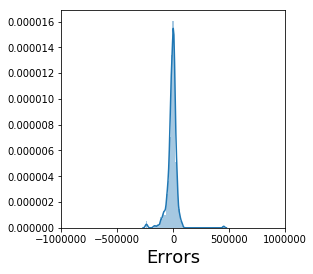

In [349]:
fig = plt.figure(figsize=(4,4))
ax = plt.subplot(111)
ax.set_xlim(-1000000,1000000)

sns.distplot(test_error_ridge)

plt.xlabel('Errors', fontsize = 18)
plt.show()

### Calculating r2 score after Ridge Regression

In [350]:
from sklearn.metrics import r2_score

In [351]:
r2_score(y_true=y_train_ridge,y_pred=y_train_pred_ridge)

0.7233123304829203

In [352]:
r2_score(y_true=y_test_ridge,y_pred=y_test_pred_ridge)

0.6238910254283466

### Lasso Regression

In [353]:
#Alpha Tunning
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 
 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,.1 ]}


lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [354]:
#Cross validation Matrix

cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=.1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.127338,0.086355,0.002431,0.003900,0.0001,{'alpha': 0.0001},-0.091852,-0.084749,-0.102444,-0.096873,-0.086114,-0.092406,0.006622,1,-0.077291,-0.079828,-0.074874,-0.073717,-0.078607,-0.076863,0.002274
1,0.015797,0.003493,0.001604,0.003208,0.0005,{'alpha': 0.0005},-0.092103,-0.086267,-0.101606,-0.097481,-0.085528,-0.092597,0.006250,2,-0.079601,-0.082600,-0.078423,-0.076972,-0.081699,-0.079859,0.002067
2,0.011799,0.003459,0.001601,0.003202,0.001,{'alpha': 0.001},-0.093408,-0.087631,-0.103452,-0.099437,-0.086163,-0.094018,0.006652,3,-0.083041,-0.084675,-0.081487,-0.079862,-0.084356,-0.082684,0.001804
3,0.005944,0.004869,0.003126,0.003833,0.005,{'alpha': 0.005},-0.110431,-0.103822,-0.123160,-0.121555,-0.102204,-0.112234,0.008728,4,-0.105079,-0.107063,-0.103458,-0.100897,-0.107862,-0.104872,0.002513
4,0.007767,0.002765,0.002274,0.003020,0.01,{'alpha': 0.01},-0.133239,-0.125688,-0.143872,-0.148059,-0.125787,-0.135329,0.009202,5,-0.129938,-0.128986,-0.124868,-0.126385,-0.131624,-0.128360,0.002434


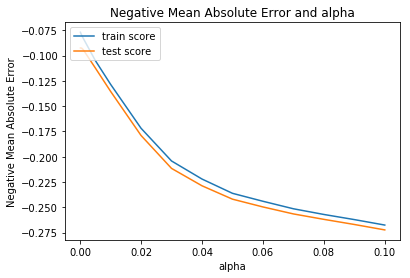

In [355]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha']

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [356]:
# Creating Lasso Model

alpha =.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [357]:
X_train.shape

(1015, 116)

In [358]:
#Predicting Train Target value
y_train_pred_lasso=lasso.predict(X_train)
y_train_pred_lasso

array([12.01511219, 11.94270473, 12.37799895, ..., 12.09251157,
       11.86767127, 12.1479287 ])

In [359]:
#Changing Scale of predicted target value to normal
y_train_pred_lasso=np.exp(y_train_pred_lasso)
y_train_pred_lasso

array([165233.05185912, 153691.82293937, 237518.06181403, ...,
       178529.9351429 , 142581.81707596, 188702.82522259])

In [360]:
#Chnaging Scale of target value to normal
y_train_lasso=np.exp(y_train)
y_train_lasso

120     180000.0
1425    142000.0
1037    287000.0
752     217000.0
889     149500.0
945     124900.0
1263    180500.0
132     150750.0
1047    145000.0
1187    262000.0
173     163000.0
400     245500.0
151     372402.0
373     123000.0
894     118858.0
780     176000.0
1043    262280.0
828     185000.0
424     139000.0
169     228000.0
533      39300.0
591     451950.0
985     125000.0
1007     88000.0
118     320000.0
1212    113000.0
473     440000.0
1117    130000.0
254     145000.0
1261    128900.0
121     100000.0
1310    335000.0
278     415298.0
54      130000.0
319     187500.0
134     180000.0
870     109500.0
717     157000.0
955     145000.0
161     412500.0
1136    119000.0
856     147000.0
692     335000.0
1006    163500.0
65      317000.0
314     178000.0
192     192000.0
322     301000.0
470     212000.0
503     289000.0
530     175000.0
1172    171900.0
757     158900.0
1031    197000.0
238     318000.0
512     129900.0
817     271000.0
952     133900.0
680     143000

In [361]:
#Finding train error using lasso regression
train_error_lasso=y_train_pred_lasso-y_train_lasso

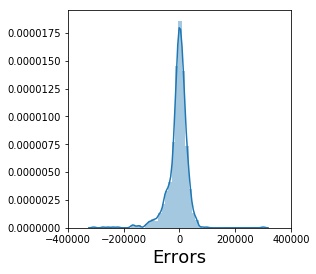

In [362]:
# Distplot for residuals
fig = plt.figure(figsize=(4,4))
ax = plt.subplot(111)
ax.set_xlim(-400000,400000)

sns.distplot(train_error_lasso)
#fig.subtitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [363]:
var1=X_train.columns

In [364]:
X_test=X_test[var1]

In [365]:
X_test.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotShape,Utilities,Condition2,HouseStyle,Exterior2nd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Other,LandContour_Lvl,LandContour_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Year since built,Year since Remodel
1196,0.080875,0.666667,0.5,0.000000,0.000000,0.0,0.439061,0.143863,0.103667,0.665314,0,0.273828,0,0,0.666667,1,0.500,0.333333,0.545455,0.333333,0.75,0.465444,0.137363,0.032505,0.000000,0.0,0.0,0,0,0.0,0,0.25,0.714286,0.866667,2,1.0,0.5,1.0,0.00,1.000000,1.0,1,0.666667,1.0,0.4,0.000000,1.0,1.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.000000,0.000000
800,0.072911,0.555556,0.5,0.000000,0.081857,0.0,0.076923,0.100818,0.041843,0.724814,0,0.240200,1,0,0.666667,1,0.500,0.333333,0.454545,0.000000,0.50,0.425247,0.553571,0.217973,0.581761,0.0,0.0,0,400,0.0,0,0.25,0.714286,0.866667,3,1.0,0.5,1.0,0.25,0.333333,1.0,1,0.666667,1.0,0.6,0.666667,1.0,1.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0.081481,0.183333
388,0.051249,0.666667,0.5,0.139821,0.000000,0.0,0.733267,0.240262,0.244711,0.000000,0,0.200038,0,0,0.666667,0,0.375,0.333333,0.272727,0.000000,0.50,0.406911,0.164835,0.047801,0.000000,0.0,0.0,0,0,0.0,0,0.25,0.285714,0.866667,2,1.0,0.5,1.0,0.75,1.000000,1.0,1,0.666667,1.0,0.6,0.666667,1.0,1.0,1.0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.066667,0.133333
359,0.067920,0.777778,0.5,0.592841,0.169383,0.0,0.064935,0.177741,0.152327,0.566599,0,0.285550,1,0,0.666667,1,0.375,0.333333,0.363636,0.333333,0.50,0.417489,0.285714,0.143403,0.000000,0.0,1.0,0,0,0.0,0,0.25,0.714286,0.866667,2,1.0,0.5,1.0,0.00,0.333333,1.0,1,0.666667,1.0,1.0,0.666667,1.0,1.0,1.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.059259,0.133333
22,0.053532,0.777778,0.5,0.314318,0.000000,0.0,0.887612,0.290835,0.318994,0.000000,0,0.260761,0,0,0.666667,0,0.375,0.333333,0.363636,0.333333,0.50,0.376587,0.234890,0.304015,0.000000,0.0,0.0,0,0,1.0,0,0.25,0.285714,0.866667,2,1.0,0.5,1.0,0.75,1.000000,1.0,1,0.666667,1.0,0.4,0.666667,1.0,1.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0.044444,0.100000


### Predict 'Test Target' value using Lasso regression

In [366]:
y_test_pred_lasso=lasso.predict(X_test)
y_test_pred_lasso

array([12.3433227 , 12.09958426, 12.16681934, 12.40009498, 12.27063914,
       12.02100601, 11.89764417, 11.84906204, 11.96455123, 11.66765471,
       12.27066692, 11.48241214, 11.74186742, 12.09784845, 12.03029486,
       11.72729637, 11.90339535, 11.64963982, 11.61463842, 12.30665489,
       12.0305838 , 11.86810643, 11.50044897, 12.50538972, 12.68651783,
       11.98957398, 11.89868205, 11.39520709, 11.76709096, 11.89674326,
       11.90753933, 12.23927046, 11.74655556, 11.64661159, 12.18242079,
       11.52932437, 11.62348002, 11.94917678, 12.01630834, 12.28983943,
       11.78588616, 12.13677915, 11.70617328, 11.54725181, 12.26348827,
       12.03107487, 11.98782475, 11.39518547, 11.97231782, 12.43749015,
       11.57259563, 11.80695431, 11.73804829, 11.69243512, 12.20911274,
       12.27950645, 11.76363412, 12.11334481, 12.15649055, 12.11480331,
       11.74676062, 12.376924  , 11.56821531, 12.04178109, 11.87535758,
       11.68950965, 12.43374198, 11.94472722, 12.31534581, 11.77

In [367]:
# Changing scale of predicted value to normal 
y_test_pred_lasso=np.exp(y_test_pred_lasso)
y_test_pred_lasso

array([229422.98964914, 179797.09776792, 192301.42469159, 242824.67923967,
       213339.30116518, 166209.78108104, 146920.09800876, 139953.01578917,
       157086.39623073, 116734.18546359, 213345.22699036,  96994.75036726,
       125726.90602589, 179485.27579708, 167760.87121421, 123908.21496367,
       147767.49748073, 114650.06137472, 110706.56498548, 221162.91619005,
       167809.35072467, 142643.8762755 ,  98760.10127321, 269787.45293918,
       323358.80236422, 161066.72173804, 147072.6626076 ,  88894.63644013,
       128938.51746448, 146787.79618267, 148381.11351144, 206751.00174485,
       126317.71480206, 114303.3988816 , 195325.13245402, 101653.41080667,
       111689.72758713, 154689.75077955, 165430.81305032, 217475.05455359,
       131384.8598067 , 186610.55910327, 121318.34019021, 103492.22942415,
       211819.18017252, 167891.77720754, 160785.22599899,  88892.71514127,
       158311.17159404, 252077.0698579 , 106148.63706726, 134182.26085245,
       125247.65443915, 1

In [368]:
#Changing Scale of tareget values to Normal
y_test_lasso=np.exp(y_test)
y_test_lasso

1196    219210.0
800     200000.0
388     191000.0
359     280000.0
22      230000.0
516     158000.0
126     128000.0
1173    200500.0
1041    173000.0
710      52000.0
930     201000.0
1098    128000.0
1014    119200.0
781     175900.0
60      158000.0
863     132500.0
463     188700.0
596     114504.0
579     131500.0
1361    260000.0
924     207500.0
868     169000.0
620      67000.0
480     326000.0
724     320000.0
1440    191000.0
645     143250.0
1100     60000.0
144     125000.0
1452    145000.0
799     175000.0
67      226000.0
509     124500.0
1385    125500.0
1074    194000.0
636      60000.0
365     147000.0
273     139000.0
429     175000.0
604     221000.0
571     120000.0
1211    164000.0
609     118500.0
74      107400.0
0       208500.0
123     153900.0
1068    151400.0
495      34900.0
598     217500.0
318     260000.0
555     113000.0
368     132000.0
809     106000.0
786     139000.0
652     191000.0
744     180000.0
835     128000.0
558     175000.0
220     204900

In [369]:
# Test Error using Lasso Regression

test_error_lasso=y_test_pred_lasso-y_test_lasso

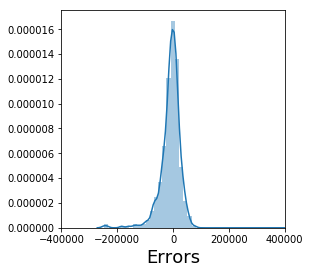

In [370]:
# Distplot od Residuals

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(111)
ax.set_xlim(-400000,400000)

sns.distplot(test_error_lasso)

plt.xlabel('Errors', fontsize = 18)
plt.show()

### Calculating r2 score after Lasso Regression

In [371]:
r2_score(y_true=y_train_lasso,y_pred=y_train_pred_lasso)

0.7690757852868506

In [372]:
r2_score(y_true=y_test_lasso,y_pred=y_test_pred_lasso)

0.6498284554275828

In [373]:
# Lasso Cofficients
lasso.coef_

array([ 0.00000000e+00,  4.25737644e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.65650157e-02,
        0.00000000e+00,  0.00000000e+00, -7.17983894e-05,  3.59624489e-01,
        6.47277215e-02,  0.00000000e+00,  7.64427719e-03,  4.09443469e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.59251864e-01,
        2.93243737e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.79863517e-04,
       -5.44164024e-06, -2.51974274e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -9.64409663e-02,  0.00000000e+00,
       -2.01264985e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.09484327e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  7.45900935e-02, -1.85255086e-02,
        0.00000000e+00, -

In [374]:
# Creating Dataframe for lasso Cofficients
df_lasso=pd.DataFrame(lasso.coef_)

In [375]:
df_lasso.head()

,0
0,0.000000
1,0.425738
2,0.000000
3,0.000000
4,0.000000


In [376]:
df_lasso.columns=['1']

In [377]:
# Creating Dataframe for Columns
df_col=pd.DataFrame(X_train.columns)

In [378]:
df_col.head()

,0
0,LotArea
1,OverallQual
2,OverallCond
3,MasVnrArea
4,BsmtFinSF1


In [379]:
df_col.shape

(116, 1)

In [380]:
# Merging df_col and df_lasso
df_coff_lasso=pd.concat([df_col,df_lasso],axis=1)

In [381]:
df_coff_lasso.head()

,0,1
0,LotArea,0.000000
1,OverallQual,0.425738
2,OverallCond,0.000000
3,MasVnrArea,0.000000
4,BsmtFinSF1,0.000000


In [382]:
df_coff_lasso.shape

(116, 2)

In [383]:
#Adding Column name to the dataframe columns
df_coff_lasso.columns=['Features','Cofficients']

In [384]:
df_coff_lasso.head()

,Features,Cofficients
0,LotArea,0.000000
1,OverallQual,0.425738
2,OverallCond,0.000000
3,MasVnrArea,0.000000
4,BsmtFinSF1,0.000000


In [385]:
df_coff_lasso.shape

(116, 2)

In [386]:
#Deleting all values from df_coff that has zero cofficient value
df_coff_lasso=df_coff_lasso.loc[df_coff_lasso['Cofficients']!=0]

In [387]:
df_coff_lasso.shape

(21, 2)

In [388]:
df_coff_lasso.head()

,Features,Cofficients
1,OverallQual,0.425738
7,TotalBsmtSF,0.056565
10,LowQualFinSF,-0.000072
11,GrLivArea,0.359624
12,BsmtFullBath,0.064728


### Top Variables after Lasso Regression

In [389]:
df_coff_lasso.sort_values(by=['Cofficients'],ascending=False)

,Features,Cofficients
1,OverallQual,0.425738
11,GrLivArea,0.359624
20,GarageCars,0.293244
19,Fireplaces,0.159252
50,MSZoning_RL,0.074590
91,Foundation_PConc,0.066047
12,BsmtFullBath,0.064728
7,TotalBsmtSF,0.056565
15,HalfBath,0.040944
41,CentralAir,0.020948


#### Top Variables after ridge are: OverallQual, GrLivArea, GarageCars, Fireplaces, MSZoning_RL, Foundation_PConc, BsmtFullBath

In [ ]:
col_coff=df_coff['Features'].values

In [ ]:
X_train_new=X_train[col_coff]

### Check the Columns by using Statsmodel which were selected by Lasso Regression 

In [ ]:
#Importi ng Statsmodel libraries
from  sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Creating Model with columns selected by Lasso Regression
X_train_sm=sm.add_constant(X_train_new)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     90.69
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:44:41   Log-Likelihood:                 767.70
No. Observations:                1015   AIC:                            -1305.
Df Residuals:                     900   BIC:                            -739.3
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.5615      0.236     44.665      0.000      10.097      11.026
LotArea                   0.4749      0.115      4.117      0.000       0.249       0.701
OverallQual               0.5371      0.053     10.124      0.000       0.433       0.641
OverallCond               0.3553      0.035     10.072      0.000       0.286       0.425
MasVnrArea                0.0151      0.052      0.288      0.773      -0.088       0.118
BsmtFinSF1                0.1635      0.033      4.889      0.000       0.098       0.229
BsmtFinSF2                0.1123      0.047      2.414      0.016       0.021       0.204
BsmtUnfSF                 0.0194      0.029      0.661      0.509      -0.038       0.077
TotalBsmtSF               0.1811      0.039      4.641      0.000       0.104       0.258
1stFlrSF                  0.4019      0.058      6.914      0.000       0.288       0.516
2ndFlrSF                  0.2370      0.036      6.537      0.000       0.166       0.308
LowQualFinSF           7.497e-05   9.27e-05      0.809      0.419      -0.000       0.000
GrLivArea                 0.3806      0.042      9.111      0.000       0.299       0.463
BsmtFullBath              0.0433      0.012      3.746      0.000       0.021       0.066
BsmtHalfBath              0.0231      0.018      1.264      0.207      -0.013       0.059
FullBath                  0.0922      0.040      2.294      0.022       0.013       0.171
HalfBath                  0.0270      0.012      2.206      0.028       0.003       0.051
BedroomAbvGr              0.0414      0.052      0.803      0.422      -0.060       0.143
KitchenAbvGr             -0.0279      0.073     -0.381      0.704      -0.172       0.116
TotRmsAbvGrd              0.0393      0.058      0.677      0.499      -0.075       0.153
Fireplaces                0.1055      0.024      4.375      0.000       0.058       0.153
GarageCars                0.1768      0.054      3.298      0.001       0.072       0.282
GarageArea                0.0739      0.061      1.208      0.227      -0.046       0.194
WoodDeckSF                0.0789      0.030      2.609      0.009       0.020       0.138
OpenPorchSF               0.0378      0.039      0.963      0.336      -0.039       0.115
EnclosedPorch             0.0556      0.041      1.347      0.178      -0.025       0.137
3SsnPorch                 0.1464      0.056      2.593      0.010       0.036       0.257
ScreenPorch               0.1173      0.033      3.515      0.000       0.052       0.183
PoolArea                  0.0004      0.000      2.132      0.033    3.51e-05       0.001
MiscVal                -1.49e-07   8.32e-06     -0.018      0.986   -1.65e-05    1.62e-05
LotShape                 -0.0050      0.010     -0.514      0.607      -0.024       0.014
Utilities              

In [ ]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,GrLivArea,inf
5,BsmtFinSF1,inf
6,BsmtFinSF2,inf
7,BsmtUnfSF,inf
8,TotalBsmtSF,inf
9,1stFlrSF,inf
10,2ndFlrSF,inf
11,LowQualFinSF,inf
0,const,3901.17
111,SaleType_WD,71.80


In [ ]:
# Correlation map for selected columns
plt.figure(figsize = (40,40))
sns.heatmap(X_train.corr(),annot = True)
plt.show()